In [1]:
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [2]:
#Create model
input = Input(shape = (50,50,1))
conv1 = Conv2D(10,4,activation='relu')(input) #10 = features map
dropout1 = Dropout(0.2)(conv1)
pool1 = MaxPool2D(pool_size=(2, 2))(dropout1)
conv2 = Conv2D(20,4,activation='relu')(pool1)
dropout2 = Dropout(0.2)(conv2)
pool2 = MaxPool2D(pool_size=(2, 2))(dropout2)
flat = Flatten()(pool2)
hidden = Dense(64, activation='relu')(flat)
output = Dense(4, activation='softmax')(hidden)
model = Model(inputs=input, outputs=output) #Create model

In [3]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 50, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 47, 47, 10)        170       
                                                                 
 dropout (Dropout)           (None, 47, 47, 10)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 10)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 20)        3220      
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 20)        0         
                                                             

In [5]:
N = 1600
x_train = np.zeros((N, 50, 50, 1), 'float')
y_train = np.zeros((N), 'float')

count = 0
class_labels = sorted(os.listdir("Dataset/train"))
for i, class_label in enumerate(class_labels):
    image_files = sorted(os.listdir(os.path.join("Dataset/train", class_label)))
    for image_file in image_files:
        im = cv2.imread(os.path.join("Dataset/train", class_label, image_file), cv2.IMREAD_GRAYSCALE)
        im = cv2.resize(im, (50, 50))
        x_train[count, :, :, 0] = im / 255.
        y_train[count] = i
        count += 1

y_train = to_categorical(y_train)
print('x_train', x_train.shape)
print('y_train', y_train.shape)

x_train (1600, 50, 50, 1)
y_train (1600, 4)


In [6]:
#Train Model
h = model.fit(x_train, y_train, epochs=20, batch_size=64, verbose=1)

Epoch 1/20
25/25 [==============================] - 2s 45ms/step - loss: 1.3756 - accuracy: 0.2894
Epoch 2/20
25/25 [==============================] - 1s 44ms/step - loss: 1.2807 - accuracy: 0.4412
Epoch 3/20
25/25 [==============================] - 1s 43ms/step - loss: 1.1698 - accuracy: 0.4806
Epoch 4/20
25/25 [==============================] - 1s 43ms/step - loss: 1.0828 - accuracy: 0.5406
Epoch 5/20
25/25 [==============================] - 1s 44ms/step - loss: 0.9948 - accuracy: 0.5763
Epoch 6/20
25/25 [==============================] - 1s 43ms/step - loss: 0.9488 - accuracy: 0.6125
Epoch 7/20
25/25 [==============================] - 1s 43ms/step - loss: 0.8894 - accuracy: 0.6350
Epoch 8/20
25/25 [==============================] - 1s 43ms/step - loss: 0.8718 - accuracy: 0.6400
Epoch 9/20
25/25 [==============================] - 1s 43ms/step - loss: 0.8158 - accuracy: 0.6744
Epoch 10/20
25/25 [==============================] - 1s 43ms/step - loss: 0.7816 - accuracy: 0.7000
Epoch 11/

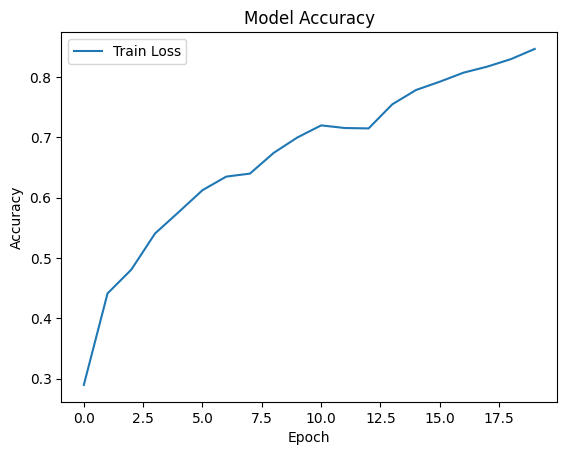

In [36]:
plt.plot(h.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy'], loc='upper left')
plt.show()

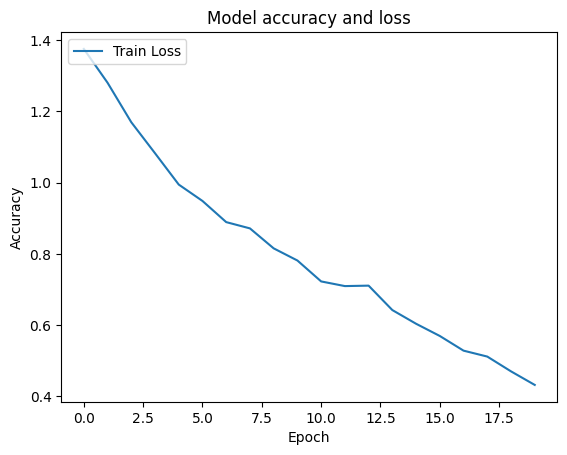

In [35]:
plt.plot(h.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss'], loc='upper left')
plt.show()

In [29]:
N = 200
x_test = np.zeros((N, 50, 50, 1), 'float')
y_test = np.zeros((N), 'float')

count = 0
class_labels = sorted(os.listdir("Dataset/test"))
for i, class_label in enumerate(class_labels):
    image_files = sorted(os.listdir(os.path.join("Dataset/test", class_label)))
    for image_file in image_files:
        im = cv2.imread(os.path.join("Dataset/test", class_label, image_file), cv2.IMREAD_GRAYSCALE)
        im = cv2.resize(im, (50, 50))
        x_test[count, :, :, 0] = im / 255.
        y_test[count] = i
        count += 1

y_test = to_categorical(y_test)
print('x_test', x_test.shape)
print('y_test', y_test.shape)

x_test (200, 50, 50, 1)
y_test (200, 4)


In [37]:
# Make predictions on the test data
y_pred = model.predict(x_test)

# Get the class predictions and confidence scores
class_preds = y_pred.argmax(axis=1)
confidences = np.max(y_pred, axis=-1)

# Define the class names
class_names = ['B', 'D', 'R', 'S']

# Define the test data directory
test_dir = 'Dataset/test/'

test_images = []
for class_folder in os.listdir(test_dir):
    class_folder_path = os.path.join(test_dir, class_folder)
    if os.path.isdir(class_folder_path):
        for image_file in os.listdir(class_folder_path):
            if image_file.endswith('.jpg'):
                image_path = os.path.join(class_folder_path, image_file)
                test_images.append(image_path)


7/7 [==============================] - 0s 10ms/step


In [38]:
# Save the predictions to a file
with open('predictions.txt', 'w') as f:
    for i in range(len(test_images)):
        image_name = os.path.basename(test_images[i])
        class_name = class_names[class_preds[i]]
        confidence = confidences[i]
        f.write("{}: {}, Confidence {}\n".format(
            image_name, class_name, confidence))

In [43]:
# Evaluate model on test dataset
loss, accuracy = model.evaluate(x_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy*100)

7/7 [==============================] - 0s 8ms/step - loss: 0.9431 - accuracy: 0.6150
Test loss: 0.9430750012397766
Test accuracy: 61.500000953674316


In [44]:
# Compute the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=-1), class_preds)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[41  6  1  2]
 [13 30  4  3]
 [ 5  6 36  3]
 [21 12  1 16]]
